In [1]:
import sys
sys.path.append('../')
from helper import *

from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt

runs = pd.read_pickle("../Data/main_1.df")

TARGET = "won"

# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None
    
thresh = bestOddsEval(runs, TARGET)
test_thresh = 0.3128447596532703

In [2]:
feat_1 = ["horse_no", "horse_age", "horse_rating", "declared_weight", "actual_weight", 
            "win_odds", "draw", "race_size", "distance", "race_class", 
            'last_race_result','win_percent', 
            'avg_distance_time', 'normal_avg_distance_time',
            'going_type_record', 'actual_weight_scaled',
            'declared_weight_scaled', 'horse_race_count', "jockey_record",
            'trainer_record', 'horse_record', 'surface_record', 'place_odds',
            'weight_change', 'weight_change_over_time','weight_change_from_average', 'weight_change_increase',
            'venue_change','venue_record', 'days_since_last_race', 'new_horse',
            'best_odds', 'best_win_percent', 'best_distance_time', 'best_going_record', 
            'best_horse_record', 'best_jockey_record','best_trainer_record', 'highest_actual_weight', 
            'lowest_actual_weight', 'start_speed', 'rode_before',
           'horse_type_Brown',
           'horse_type_Colt', 'horse_type_Filly', 'horse_type_Gelding',
           'horse_type_Grey', 'horse_type_Horse', 'horse_type_Mare',
           'horse_type_Rig', 'horse_type_Roan', 'horse_country_ARG',
           'horse_country_AUS', 'horse_country_BRZ', 'horse_country_CAN',
           'horse_country_FR', 'horse_country_GB', 'horse_country_GER',
           'horse_country_GR', 'horse_country_IRE', 'horse_country_ITY',
           'horse_country_JPN', 'horse_country_NZ', 'horse_country_SAF',
           'horse_country_SPA', 'horse_country_USA', 'horse_country_ZIM',
          'going_type_fast', 'going_type_slow', 'going_type_wet'
           ]
feat_2 = ["horse_no", "horse_age", "horse_rating", "declared_weight", "actual_weight", 
            "draw", "race_size", "distance", "race_class", 
            'last_race_result','win_percent', 
            'avg_distance_time', 'normal_avg_distance_time',
            'going_type_record', 'actual_weight_scaled',
            'declared_weight_scaled', 'horse_race_count', "jockey_record",
            'trainer_record', 'horse_record', 'surface_record',
            'weight_change', 'weight_change_over_time','weight_change_from_average', 'weight_change_increase',
            'venue_change','venue_record', 'days_since_last_race', 'new_horse',
            'best_win_percent', 'best_distance_time', 'best_going_record', 
            'best_horse_record', 'best_jockey_record','best_trainer_record', 'highest_actual_weight', 
            'lowest_actual_weight', 'start_speed', 'rode_before',
           'horse_type_Brown',
           'horse_type_Colt', 'horse_type_Filly', 'horse_type_Gelding',
           'horse_type_Grey', 'horse_type_Horse', 'horse_type_Mare',
           'horse_type_Rig', 'horse_type_Roan', 'horse_country_ARG',
           'horse_country_AUS', 'horse_country_BRZ', 'horse_country_CAN',
           'horse_country_FR', 'horse_country_GB', 'horse_country_GER',
           'horse_country_GR', 'horse_country_IRE', 'horse_country_ITY',
           'horse_country_JPN', 'horse_country_NZ', 'horse_country_SAF',
           'horse_country_SPA', 'horse_country_USA', 'horse_country_ZIM',
          'going_type_fast', 'going_type_slow', 'going_type_wet'
           ]

In [3]:
# parameter tuned model
bestModel = XGBClassifier()
scores_1, feats_1 = selectFeatures_k(bestModel, runs, feat_2, TARGET)

k: 2/67
k: 3/67
k: 4/67
k: 5/67
k: 6/67
k: 7/67
k: 8/67
k: 9/67
k: 10/67
k: 11/67
k: 12/67
k: 13/67
k: 14/67
k: 15/67
k: 16/67
k: 17/67
k: 18/67
k: 19/67
k: 20/67
k: 21/67
k: 22/67
k: 23/67
k: 24/67
k: 25/67
k: 26/67
k: 27/67
k: 28/67
k: 29/67
k: 30/67
k: 31/67
k: 32/67
k: 33/67
k: 34/67
k: 35/67
k: 36/67
k: 37/67
k: 38/67
k: 39/67
k: 40/67
k: 41/67
k: 42/67
k: 43/67
k: 44/67
k: 45/67
k: 46/67
k: 47/67
k: 48/67
k: 49/67
k: 50/67
k: 51/67
k: 52/67
k: 53/67
k: 54/67
k: 55/67
k: 56/67
k: 57/67
k: 58/67
k: 59/67
k: 60/67
k: 61/67
k: 62/67
k: 63/67
k: 64/67
k: 65/67
k: 66/67
k: 67/67


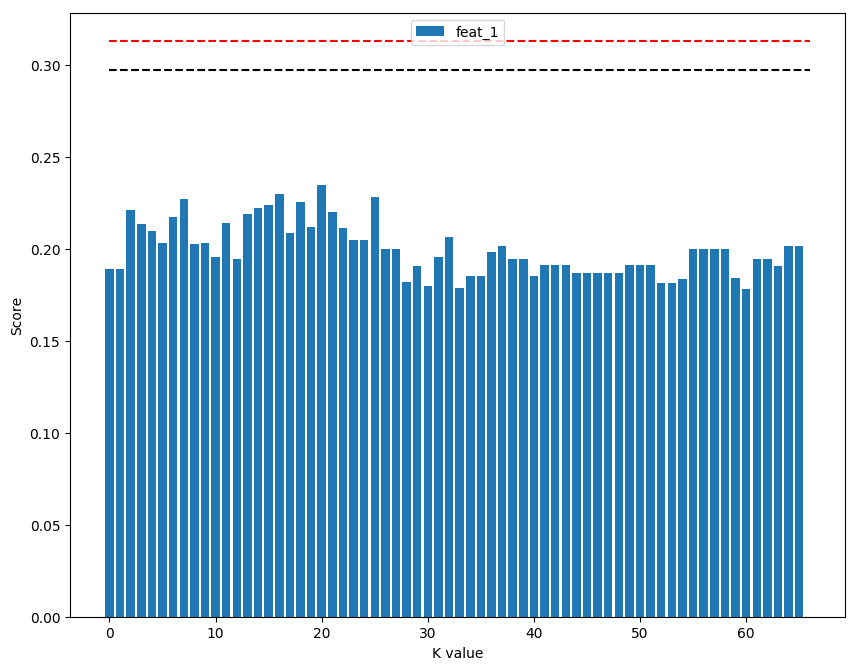

In [5]:
N_1 = len(feat_2)-1
ind_1 = np.arange(N_1)

plt.figure(figsize=(10,8), dpi=100)
plt.bar(ind_1, scores_1, label="feat_1")
#plt.bar(ind_2+offset/2., scores_2, width=offset, label="feat_2")
plt.plot([0, N_1], [thresh,thresh], "k--")
plt.plot([0, N_1], [test_thresh,test_thresh], "r--")
plt.xlabel("K value")
plt.ylabel("Score")
plt.legend()

In [ ]:
best_feat_1 = feats_1[np.argmax(scores_1, axis=0)]

print("Best feat_1 selection:")
print(best_feat_1)
print(max(scores_1))

In [ ]:
for i in range(30):
    print(i, feats_1[i])

In [ ]:
test_thresh = bestOddsEval(runs[int(len(runs) * 0.8):], TARGET)